In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [22]:


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './LEGO brick images v1',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    './LEGO brick images v1',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5104 images belonging to 16 classes.
Found 1275 images belonging to 16 classes.


# Variant 1

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
# ])
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(128,128,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(4, 4))

#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.MaxPooling2D(2, 2))
#model.add(tf.keras.layers.Dropout(0.25))

#model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())

#model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.MaxPooling2D(2, 2))

# !!! Important to remind 
# sigmoid - from 0 to 1 (for 2 classes)
# softmax - from 0 to 1 (for 3 or more classes)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(train_generator.num_classes, activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
#plot_model(model, show_shapes=True)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,783,632 (64.02 MB)

 Trainable params: 16,783,504 (64.02 MB)

 Non-trainable params: 128 (512.00 B)

In [24]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10


e:\StorageCloud\OneDrive\Документы\GitHub\IntelOb\.env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 81s 497ms/step - Top2: 0.5920 - accuracy: 0.4609 - loss: 5.8794 - val_Top2: 0.6298 - val_accuracy: 0.4588 - val_loss: 2.4095
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 468ms/step - Top2: 0.8986 - accuracy: 0.7781 - loss: 0.6506 - val_Top2: 0.8180 - val_accuracy: 0.7035 - val_loss: 1.6290
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 467ms/step - Top2: 0.9495 - accuracy: 0.8374 - loss: 0.4381 - val_Top2: 0.8651 - val_accuracy: 0.7192 - val_loss: 0.9643
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 482ms/step - Top2: 0.9689 - accuracy: 0.8832 - loss: 0.3236 - val_Top2: 0.9004 - val_accuracy: 0.7976 - val_loss: 0.5783
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 471ms/step - Top2: 0.9813 - accuracy: 0.9102 - loss: 0.2424 - val_Top2: 0.9098 - val_accuracy: 0.7992 - val_loss: 0.6567
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 470ms/step - Top2: 0.9829 - accuracy: 0.9212 - loss: 0.2174 - val_Top2: 0.9247 - val_accuracy: 0.8220 - val_loss: 0.6133
Epoch 7/10
160/160 ━━

In [25]:
def display_history(history, names, title):
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()

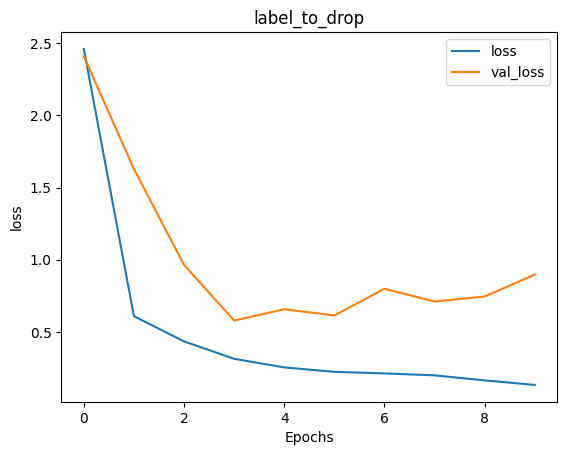

In [26]:
display_history(history, ['loss', 'val_loss'], "label_to_drop")

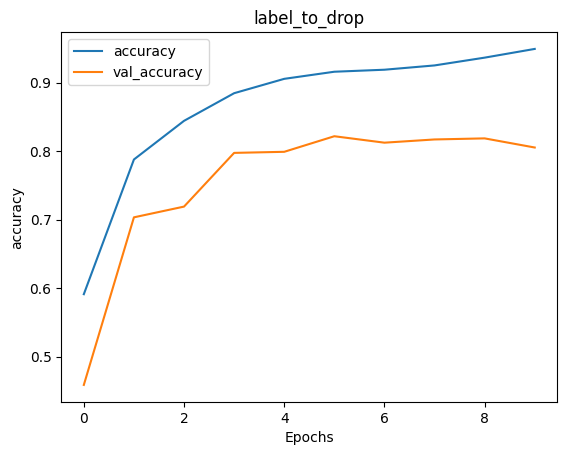

In [27]:
display_history(history, ['accuracy', 'val_accuracy'], "label_to_drop")

In [28]:
model.predict(val_generator)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


array([[5.1449570e-06, 3.4562639e-05, 2.5525376e-12, ..., 2.5003104e-07,
        7.3363915e-09, 1.5875662e-08],
       [8.7008101e-07, 1.1144740e-05, 1.5254570e-07, ..., 1.2672038e-07,
        6.5938458e-02, 1.5368112e-05],
       [5.0724580e-10, 2.7388857e-11, 9.7162074e-01, ..., 6.4556489e-23,
        4.4765389e-18, 1.7156254e-11],
       ...,
       [4.1813474e-13, 2.9458491e-12, 1.2174402e-06, ..., 1.5068585e-16,
        4.6477678e-12, 1.8460893e-13],
       [4.7327651e-07, 1.5683629e-08, 2.7069573e-09, ..., 2.9625195e-07,
        4.6429562e-07, 1.4625046e-07],
       [4.7996417e-17, 1.8975505e-15, 8.1096521e-05, ..., 8.5523453e-23,
        5.9360950e-15, 3.9692212e-12]], dtype=float32)